<a href="https://colab.research.google.com/github/RP272/Hands-On-ML/blob/main/Classification_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip the dataset and load the data

In [5]:
!unzip titanic.zip -d /content/titanic
%cd /content/titanic

Archive:  titanic.zip
  inflating: /content/titanic/gender_submission.csv  
  inflating: /content/titanic/test.csv  
  inflating: /content/titanic/train.csv  
/content/titanic


In [6]:
import pandas as pd
import os

def load_titanic_train_dataset(dataset_path):
  csv_path = os.path.join(dataset_path, "train.csv")
  return pd.read_csv(csv_path)

def load_titanic_test_dataset(dataset_path):
  csv_path = os.path.join(dataset_path, "test.csv")
  return pd.read_csv(csv_path)

In [7]:
dir_path = "/content/titanic"

train_set = load_titanic_train_dataset(dir_path)
test_set = load_titanic_test_dataset(dir_path)

# Get data description. Clean the data

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Train set is missing age value for 177 passengers. The missing values will be filled with median value in transform pipeline.

In [ ]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Test set has the same problem. It has 86 missing values for age feature and 1 missing value for fare feature. Missing values will be filled by transform pipeline.

The other part of data cleaning will be related to text values. I think that no real value comes from *Name* column so there should be the possibility to drop this column. The *Sex* column will be binary encoded as 0 - male and 1 for female. *Ticket* and *Cabin* columns will also be dropped. The *Embarked* column has 3 possible values, so it will be encoded using the one-hot technique.

In [87]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_attribs = ["Pclass", "SibSp", "Parch", "Age", "Fare"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), ["Embarked", "Sex"])
])

In [88]:
titanic_train_prepared = full_pipeline.fit_transform(train_set)
y_train = train_set["Survived"].to_numpy()

# Define function for measuring classifier performance

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b--")

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

def measure_classifier(y, y_predict):
  print(f"Accuracy: {accuracy_score(y, y_predict)}")
  print(f"F1 score: {f1_score(y, y_predict)}")
  print(f"Precission: {precision_score(y, y_predict)}")
  print(f"Recall: {recall_score(y, y_predict)}")
  print(f"AUC: {roc_auc_score(y, y_predict)}")

def measure_classifier_performance_cv(clf, X, y, cv, method):
  y_probas = cross_val_predict(clf, X, y, cv=cv, method=method)
  y_predict = cross_val_predict(clf, X, y, cv=cv)
  y_scores = y_probas[:, 1]
  precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
  plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
  plt.show()
  plot_precision_vs_recall(precisions, recalls)
  plt.show()
  fpr, tpr, thresholds = roc_curve(y, y_scores)
  plot_roc_curve(fpr, tpr)
  plt.show()
  measure_classifier(y, y_predict)

# KNeighborsClassifier

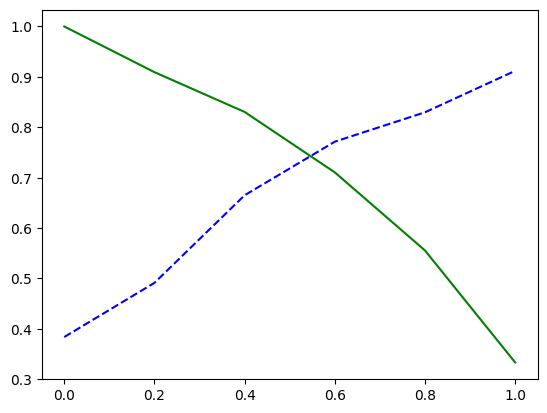

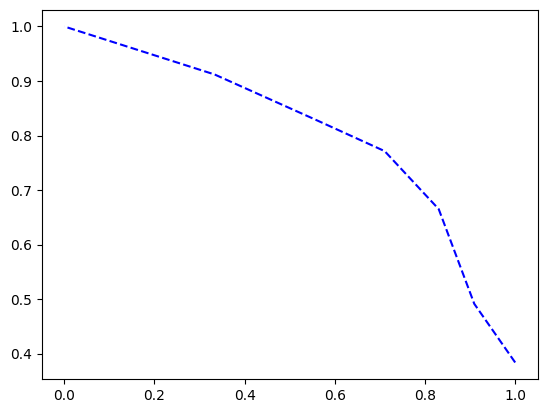

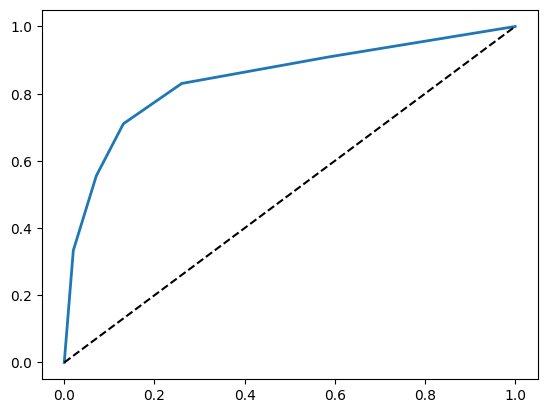

Accuracy: 0.8080808080808081
F1 score: 0.7397260273972602
Precission: 0.7714285714285715
Recall: 0.7105263157894737
AUC: 0.7896893874029336


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
measure_classifier_performance_cv(knn_clf, titanic_train_prepared, y_train, 5, "predict_proba")

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'weights': ["uniform", "distance"], 'n_neighbors': [3, 5, 7, 11, 13, 15, 17, 19, 21, 23]}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(titanic_train_prepared, y_train)

cvres = grid_search.cv_results_
print(grid_search.best_params_)

for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(accuracy, params)

knn_best = grid_search.best_estimator_
y_pred = knn_best.predict(titanic_train_prepared)
measure_classifier(y_train, y_pred)

{'n_neighbors': 17, 'weights': 'uniform'}
0.7856341189674523 {'n_neighbors': 3, 'weights': 'uniform'}
0.7631874298540966 {'n_neighbors': 3, 'weights': 'distance'}
0.787878787878788 {'n_neighbors': 5, 'weights': 'uniform'}
0.7643097643097643 {'n_neighbors': 5, 'weights': 'distance'}
0.7957351290684623 {'n_neighbors': 7, 'weights': 'uniform'}
0.7744107744107743 {'n_neighbors': 7, 'weights': 'distance'}
0.797979797979798 {'n_neighbors': 11, 'weights': 'uniform'}
0.7777777777777777 {'n_neighbors': 11, 'weights': 'distance'}
0.8002244668911335 {'n_neighbors': 13, 'weights': 'uniform'}
0.7744107744107743 {'n_neighbors': 13, 'weights': 'distance'}
0.8013468013468014 {'n_neighbors': 15, 'weights': 'uniform'}
0.7811447811447811 {'n_neighbors': 15, 'weights': 'distance'}
0.8148148148148149 {'n_neighbors': 17, 'weights': 'uniform'}
0.7923681257014591 {'n_neighbors': 17, 'weights': 'distance'}
0.8114478114478114 {'n_neighbors': 19, 'weights': 'uniform'}
0.7912457912457912 {'n_neighbors': 19, 'weig

In [102]:
test_prepared = full_pipeline.transform(test_set)
y_pred = knn_best.predict(test_prepared)
id_start = 892

with open("knn.csv", "w+") as file:
  file.write("PassengerId,Survived\n")
  for idx in range(len(y_pred)):
    file.write(f"{id_start + idx},{y_pred[idx]}\n")

The KNN version achieved 0.74401 accuracy for test dataset.

# Random Forest Classifier

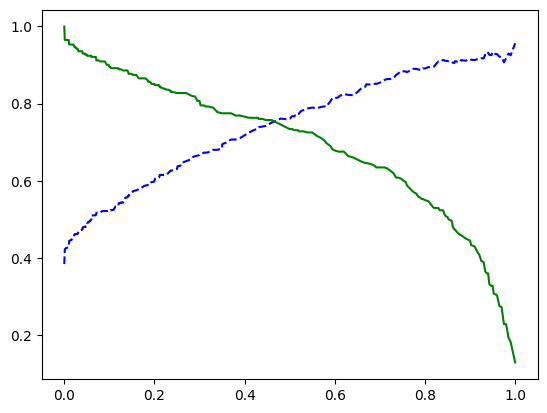

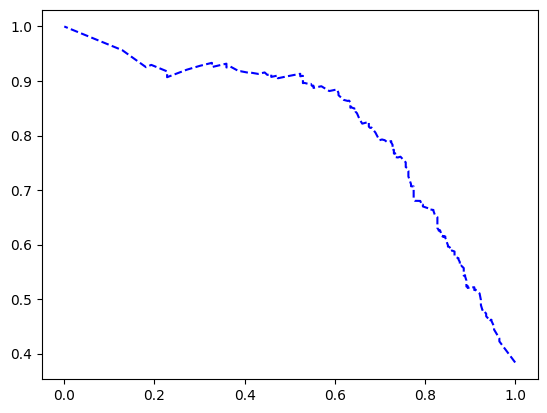

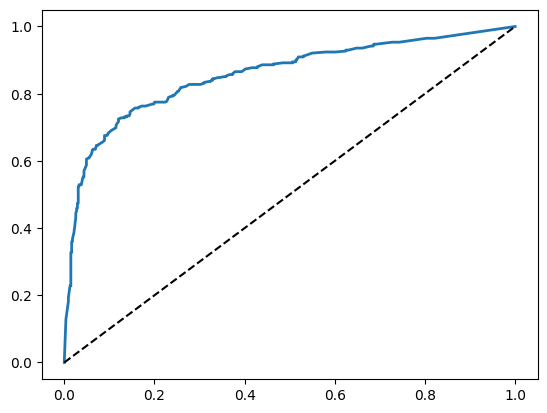

Accuracy: 0.8125701459034792
F1 score: 0.750373692077728
Precission: 0.7675840978593272
Recall: 0.7339181286549707
AUC: 0.7977423065861375


In [103]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
measure_classifier_performance_cv(forest_clf, titanic_train_prepared, y_train, 5, "predict_proba")

In [104]:
param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(titanic_train_prepared, y_train)

cvres = grid_search.cv_results_
print(grid_search.best_params_)

for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(accuracy, params)

forest_best = grid_search.best_estimator_
y_pred = forest_best.predict(titanic_train_prepared)
measure_classifier(y_train, y_pred)

{'max_features': 6, 'n_estimators': 10}
0.77665544332211 {'max_features': 2, 'n_estimators': 3}
0.7755331088664422 {'max_features': 2, 'n_estimators': 10}
0.7833894500561168 {'max_features': 2, 'n_estimators': 30}
0.7620650953984288 {'max_features': 4, 'n_estimators': 3}
0.7890011223344556 {'max_features': 4, 'n_estimators': 10}
0.7901234567901234 {'max_features': 4, 'n_estimators': 30}
0.7867564534231201 {'max_features': 6, 'n_estimators': 3}
0.8024691358024691 {'max_features': 6, 'n_estimators': 10}
0.7946127946127945 {'max_features': 6, 'n_estimators': 30}
0.7833894500561166 {'max_features': 8, 'n_estimators': 3}
0.7968574635241302 {'max_features': 8, 'n_estimators': 10}
0.7991021324354657 {'max_features': 8, 'n_estimators': 30}
0.7867564534231201 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.787878787878788 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7777777777777778 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.7901234567901235 {'boo

The Random Forest Classifier got around 80% accuracy when fine-tuned, however it's prediction on the whole dataset got around 96% accuracy. Probably a sign of overfitting.

In [106]:
test_prepared = full_pipeline.transform(test_set)
y_test_pred = forest_best.predict(test_prepared)

id_start = 892
with open("forest.csv", "w+") as file:
  file.write("PassengerId,Survived\n")
  for idx in range(len(y_test_pred)):
    file.write(f"{id_start + idx},{y_test_pred[idx]}\n")

Random Forest Classifier got 0.75837 accuracy on test set. Slight improvement compared to KNN.

# Support Vector Machine (SVM)